In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [44]:
df = pd.read_csv("student_performance_dataset.csv", encoding="utf-8-sig")

print("Dataset Shape:", df.shape)
print("\nColumns:")
for col in df.columns:
    print(repr(col))

df.head()

Dataset Shape: (1000000, 9)

Columns:
'student_id'
'age'
'gender'
'study_hours_per_day'
'attendance_percentage'
'sleep_hours'
'internet_usage_hours'
'exam_score'
'performance_level'


,student_id,age,gender,study_hours_per_day,attendance_percentage,sleep_hours,internet_usage_hours,exam_score,performance_level
0,1,24,Male,2.0,80.9,5.8,3.6,40.1,Poor
1,2,21,Female,3.0,94.2,5.0,1.5,54.2,Average
2,3,22,Male,1.3,76.2,6.5,2.3,25.4,Poor
3,4,24,Female,6.3,84.2,8.2,5.6,86.8,Excellent
4,5,20,Female,5.3,95.4,4.0,1.6,66.0,Average


In [45]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\nCleaned Columns:")
print(df.columns.tolist())


Cleaned Columns:
['student_id', 'age', 'gender', 'study_hours_per_day', 'attendance_percentage', 'sleep_hours', 'internet_usage_hours', 'exam_score', 'performance_level']


In [46]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   student_id             1000000 non-null  int64  
 1   age                    1000000 non-null  int64  
 2   gender                 1000000 non-null  object 
 3   study_hours_per_day    1000000 non-null  float64
 4   attendance_percentage  1000000 non-null  float64
 5   sleep_hours            1000000 non-null  float64
 6   internet_usage_hours   1000000 non-null  float64
 7   exam_score             1000000 non-null  float64
 8   performance_level      1000000 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 68.7+ MB


,student_id,age,study_hours_per_day,attendance_percentage,sleep_hours,internet_usage_hours,exam_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,21.000294,4.496587,80.007976,6.499803,3.499342,59.974491
std,288675.278933,1.999321,2.019772,11.548656,1.444889,1.443735,17.261834
min,1.000000,18.000000,1.000000,60.000000,4.000000,1.000000,7.900000
25%,250000.750000,19.000000,2.800000,70.000000,5.200000,2.200000,46.000000
50%,500000.500000,21.000000,4.500000,80.000000,6.500000,3.500000,60.000000
75%,750000.250000,23.000000,6.200000,90.000000,7.800000,4.700000,74.000000
max,1000000.000000,24.000000,8.000000,100.000000,9.000000,6.000000,100.000000


In [47]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
student_id               0
age                      0
gender                   0
study_hours_per_day      0
attendance_percentage    0
sleep_hours              0
internet_usage_hours     0
exam_score               0
performance_level        0
dtype: int64


In [48]:
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include="object").columns

# Fill numeric with median (better than mean in real-world data)
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing After Cleaning:")
print(df.isnull().sum())


Missing After Cleaning:
student_id               0
age                      0
gender                   0
study_hours_per_day      0
attendance_percentage    0
sleep_hours              0
internet_usage_hours     0
exam_score               0
performance_level        0
dtype: int64


In [49]:
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

In [50]:
df = df.replace({"yes":1, "no":0})
print("dataframe", df)

dataframe         student_id  age  gender  study_hours_per_day  attendance_percentage  \
0                1   24    male                  2.0                   80.9   
1                2   21  female                  3.0                   94.2   
2                3   22    male                  1.3                   76.2   
3                4   24  female                  6.3                   84.2   
4                5   20  female                  5.3                   95.4   
...            ...  ...     ...                  ...                    ...   
999995      999996   22    male                  5.2                   90.8   
999996      999997   18    male                  3.6                   92.6   
999997      999998   23    male                  2.5                   77.7   
999998      999999   19  female                  4.8                   84.3   
999999     1000000   20  female                  2.9                   79.9   

        sleep_hours  internet_usage_hours

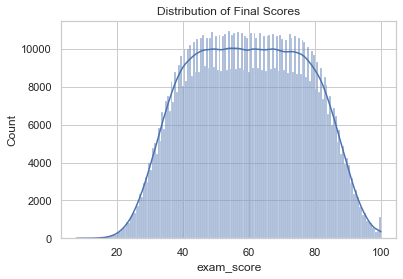

In [53]:
# 8. Distribution of Target Variable (Final Score)
plt.figure(figsize=(6,4))
sns.histplot(df["exam_score"], kde=True)
plt.title("Distribution of Final Scores")
plt.show()

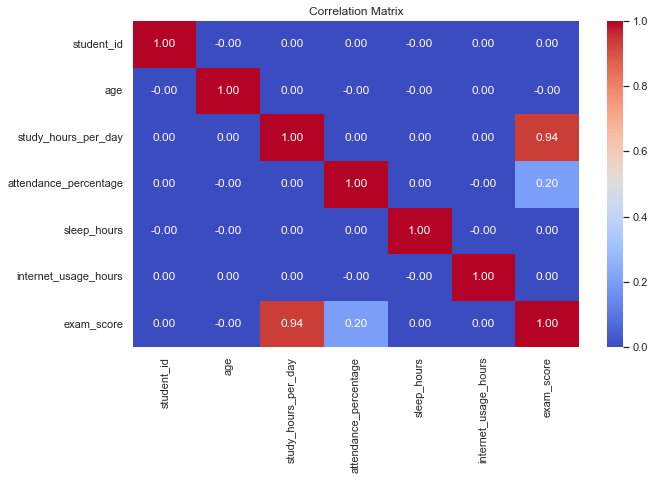

In [54]:
# 9. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
# The correlation heatmap shows that:
# (a)Study hours per day has the strongest positive relationship with exam scores (0.94), making it the most influential 
# variable in the dataset. 
# (b)Attendance has a weaker but positive correlation (0.20), suggesting some impact on performance. 
# (c)Other variables such as sleep hours and internet usage do not show significant linear relationships. 
# (d)Based on this, study hours appears to be the primary driver of exam outcomes in this dataset.

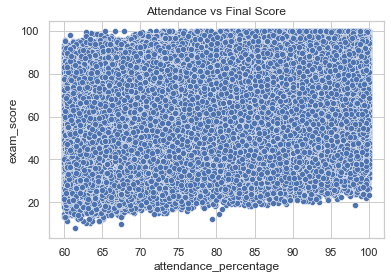

In [56]:
# 11. Attendance vs Final Score
plt.figure(figsize=(6,4))
sns.scatterplot(x="attendance_percentage", y="exam_score", data=df)
plt.title("Attendance vs Final Score")
plt.show()

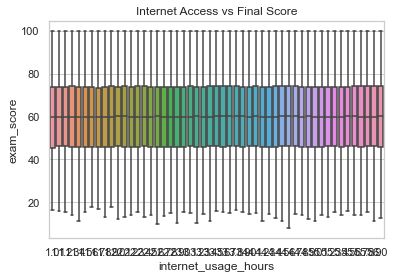

In [57]:
# 12. Boxplot for Categorical Variable (Example)
plt.figure(figsize=(6,4))
sns.boxplot(x="internet_usage_hours", y="exam_score", data=df)
plt.title("Internet Access vs Final Score")
plt.show()